In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
df=pd.read_csv('../DATA/fake_reg.csv')

In [28]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


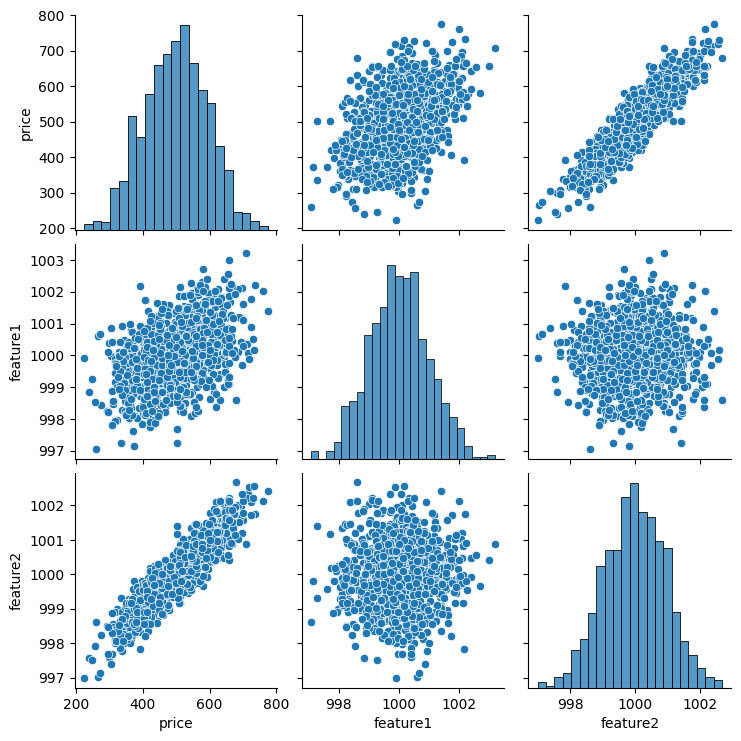

In [29]:
sns.pairplot(df)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X=df[['feature1','feature2']].values

In [32]:
y=df['price'].values

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler=MinMaxScaler()

In [36]:
scaler.fit(X_train)

MinMaxScaler()

In [37]:
X_train=scaler.transform(X_train)

In [38]:
X_test=scaler.transform(X_test)

In [39]:
X_train.min()

0.0

In [40]:
X_test.min()

-0.014108392024525074

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
model=Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [43]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 4ms/step - loss: 256679.7812
Epoch 2/250
21/21 [==============================] - 0s 4ms/step - loss: 256638.1562
Epoch 3/250
21/21 [==============================] - 0s 4ms/step - loss: 256614.0000
Epoch 4/250
21/21 [==============================] - 0s 4ms/step - loss: 256592.9375
Epoch 5/250
21/21 [==============================] - 0s 4ms/step - loss: 256572.0156
Epoch 6/250
21/21 [==============================] - 0s 3ms/step - loss: 256551.1094
Epoch 7/250
21/21 [==============================] - 0s 4ms/step - loss: 256530.2188
Epoch 8/250
21/21 [==============================] - 0s 4ms/step - loss: 256509.2969
Epoch 9/250
21/21 [==============================] - 0s 4ms/step - loss: 256488.4531
Epoch 10/250
21/21 [==============================] - 0s 4ms/step - loss: 256467.6250
Epoch 11/250
21/21 [==============================] - 0s 4ms/step - loss: 256446.6094
Epoch 12/250
21/21 [==============================] - 0s 4ms/st

21/21 [==============================] - 0s 4ms/step - loss: 252721.5938
Epoch 191/250
21/21 [==============================] - 0s 4ms/step - loss: 252700.7969
Epoch 192/250
21/21 [==============================] - 0s 3ms/step - loss: 252680.1250
Epoch 193/250
21/21 [==============================] - 0s 3ms/step - loss: 252659.4688
Epoch 194/250
21/21 [==============================] - 0s 3ms/step - loss: 252638.7344
Epoch 195/250
21/21 [==============================] - 0s 3ms/step - loss: 252618.0000
Epoch 196/250
21/21 [==============================] - 0s 4ms/step - loss: 252597.2500
Epoch 197/250
21/21 [==============================] - 0s 3ms/step - loss: 252576.5312
Epoch 198/250
21/21 [==============================] - 0s 4ms/step - loss: 252555.7969
Epoch 199/250
21/21 [==============================] - 0s 4ms/step - loss: 252535.0625
Epoch 200/250
21/21 [==============================] - 0s 4ms/step - loss: 252514.4062
Epoch 201/250
21/21 [==============================] - 0s

In [44]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

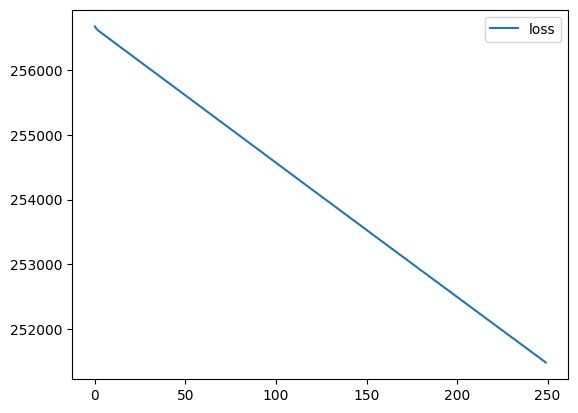

In [45]:
loss_df.plot()

In [46]:
model.evaluate(X_test,y_test,verbose=0)

253827.953125

In [47]:
model.evaluate(X_train,y_train,verbose=0)

251468.390625

In [48]:
test_predictions=model.predict(X_test)

11/11 [==============================] - 0s 3ms/step


In [49]:
test_predictions

array([[5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],
       [5.2562165],


In [50]:
test_predictions=pd.Series(test_predictions)

ValueError: Data must be 1-dimensional

In [ ]:
test_predictions

In [ ]:
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])

In [ ]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)

In [ ]:
pred_df.columns=['Test True Y','Model Predictions','delete']

In [ ]:
pred_df=pred_df.drop(['delete'], axis=1)

In [ ]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

In [ ]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
df=pd.read_csv('../DATA/kc_house_data.csv')

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().traanspose()

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['bedrooms'])

In [ ]:
df.corr()['price'].sort_values()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [ ]:
sns.scatterplot(x='price',y='lat',data=df)

In [ ]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [ ]:
df.sort_values('price',ascending=False).head(20)

In [ ]:
non_top_1_perc=df.sort_values('price',ascending=False).iloc[216:]

In [ ]:
non_top_1_perc=df.sort_values('price',ascending=False).iloc[216:]
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price')

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

In [ ]:
df=df.drop('id',axis=1)

In [ ]:
df

In [ ]:
df['date']

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['date']

In [ ]:
df['year']=df['date'].apply(lambda date: date.year)

In [ ]:
df['month']=df['date'].apply(lambda date: date.month)

In [ ]:
df['month']

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
df=df.drop('date',axis=1)

In [ ]:
df

In [ ]:
df=df.drop('zipcode',axis=1)

In [ ]:
X=df.drop('price',axis=1).values
y=df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=128,epochs=400)

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

In [ ]:
mean_absolute_error(y_test,predictions)

In [ ]:
df['price'].describe()

In [ ]:
5.402966e+05

In [ ]:
explained_variance_score(y_test,predictions)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
single_house=df.drop('price',axis=1).iloc[0]

In [ ]:
single_house=df.drop('price',axis=1).iloc[0]
single_house=scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
single_house

model.predict(single_house)

In [ ]:
df.head(1)

Classification


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
df=pd.read_csv('../DATA/cancer_classification.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().transpose()

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape

In [ ]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test))

In [ ]:
losses=pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#help(EarlyStopping)

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

In [ ]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

In [ ]:
model_loss_dropout=pd.DataFrame(model.history.history)

In [ ]:
model_loss_dropout.plot()

In [ ]:
predictions=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [51]:
print(confusion_matrix(y_test,predictions))

NameError: name 'confusion_matrix' is not defined

# Keras Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info=pd.read_csv('../DATA/lending_club_info.csv')

In [3]:
data_info.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [4]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [6]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [7]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [8]:
feat_info('mort_acc')

Number of mortgage accounts.


In [9]:
df=pd.read_csv('../DATA/lending_club_loan_two.csv')

In [10]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [12]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

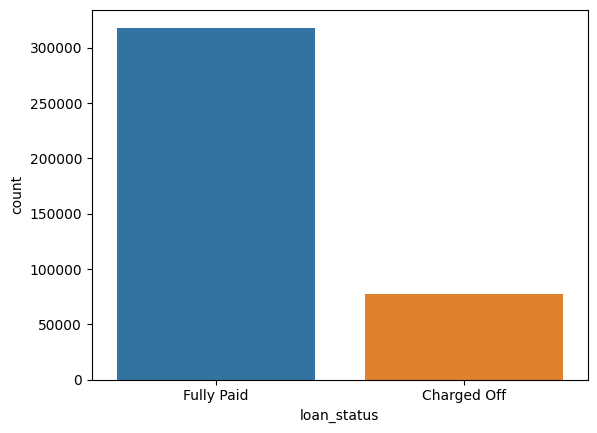

In [13]:
sns.countplot(x=df["loan_status"])

<Axes: xlabel='loan_amnt', ylabel='Count'>

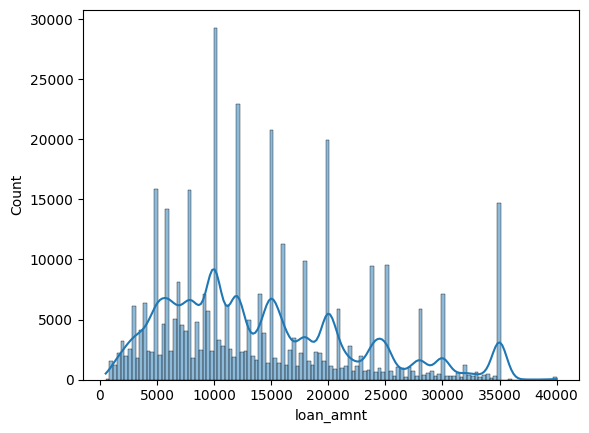

In [14]:
sns.histplot(data=df,x="loan_amnt",kde=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9124\2022642379.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False,bins=40)


(0.0, 45000.0)

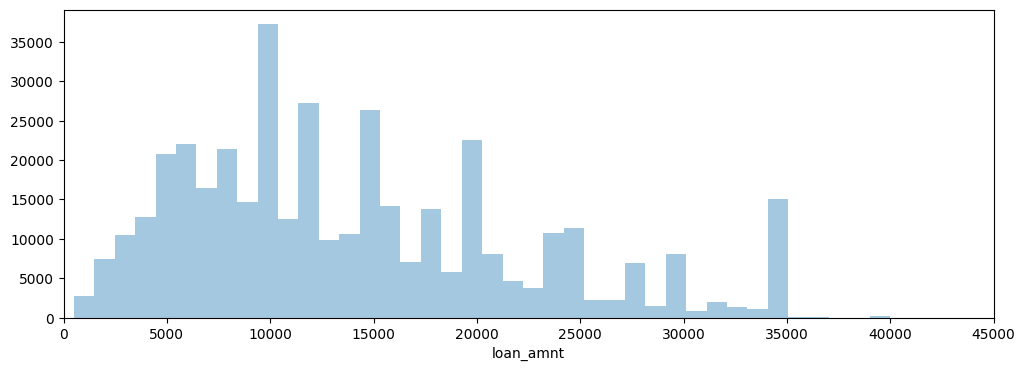

In [15]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

<Axes: xlabel='loan_amnt', ylabel='Count'>

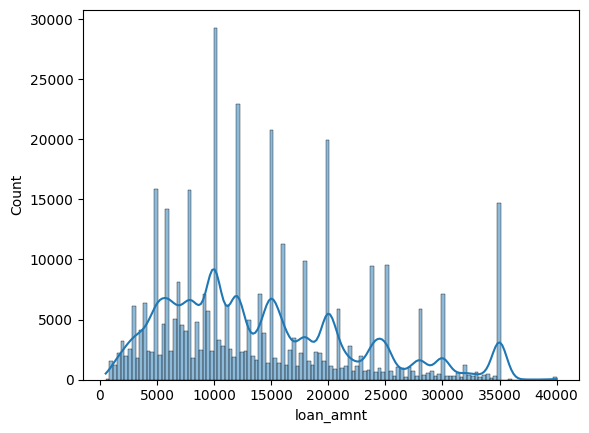

In [16]:
sns.histplot(data=df,x="loan_amnt",kde=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [18]:
df.corr()

C:\Users\ACER\AppData\Local\Temp\ipykernel_9124\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


C:\Users\ACER\AppData\Local\Temp\ipykernel_9124\2288469261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidth=1,cmap=sns.cubehelix_palette(as_cmap=True))


<Axes: >

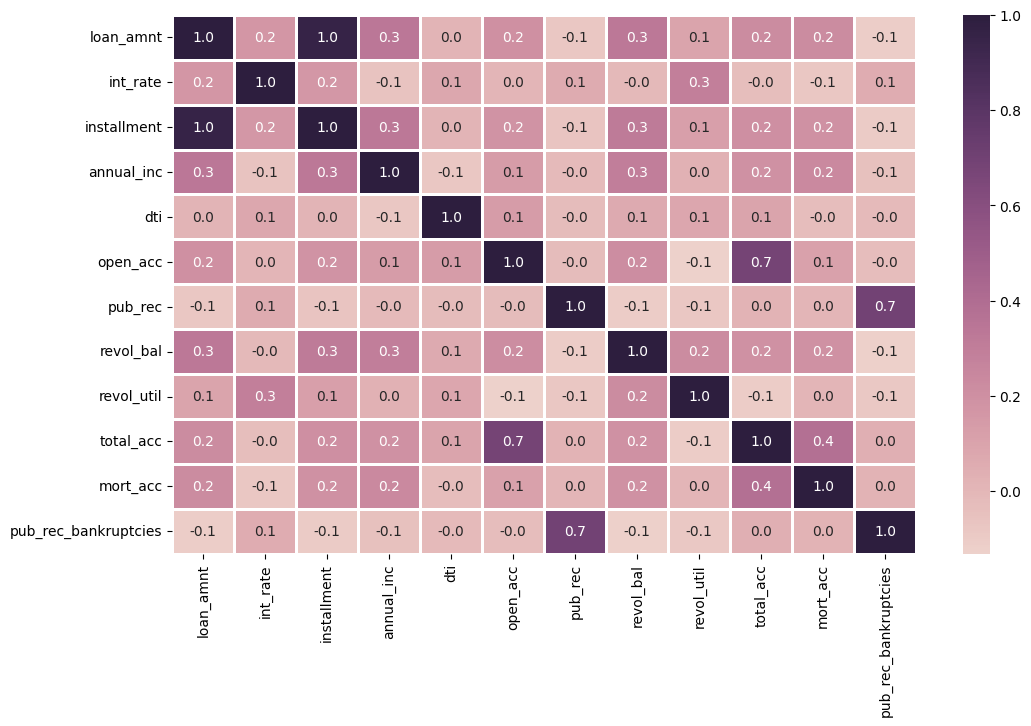

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidth=1,cmap=sns.cubehelix_palette(as_cmap=True))

In [20]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [21]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

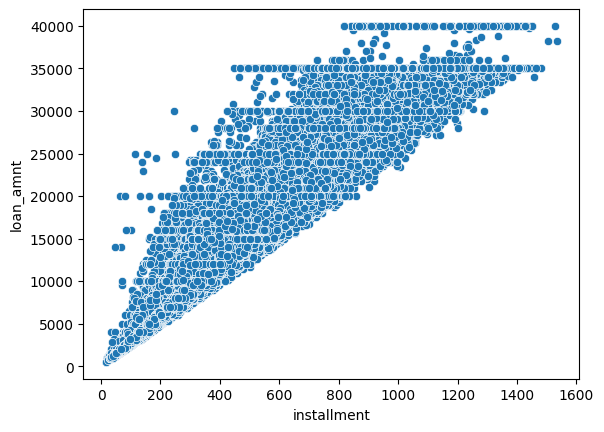

In [22]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

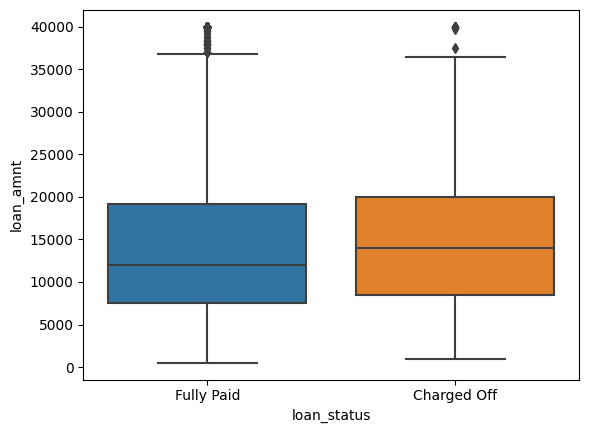

In [23]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [24]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [25]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [26]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [27]:
feat_info('sub_grade')

LC assigned loan subgrade


<Axes: xlabel='grade', ylabel='count'>

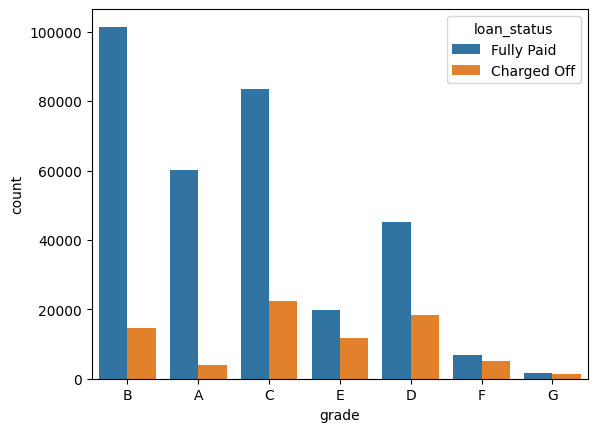

In [28]:
sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

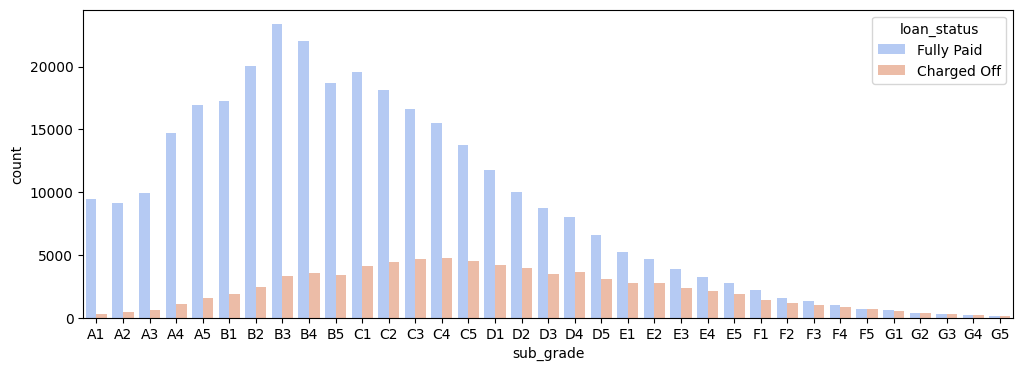

In [29]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')

In [30]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [31]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [32]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [33]:
df['sub_grade'].count()

396030

<Axes: xlabel='sub_grade', ylabel='count'>

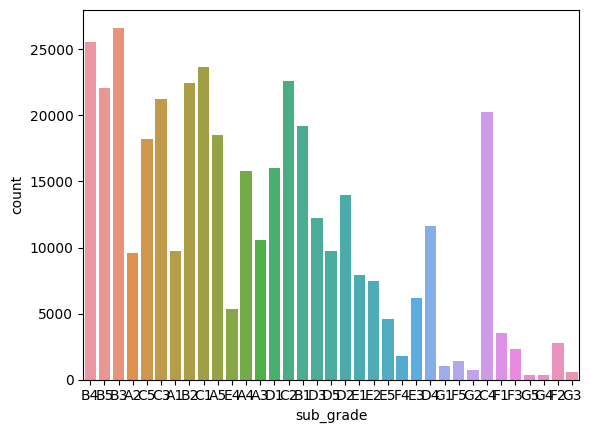

In [34]:
sns.countplot(x='sub_grade',data=df)

<Axes: xlabel='sub_grade', ylabel='count'>

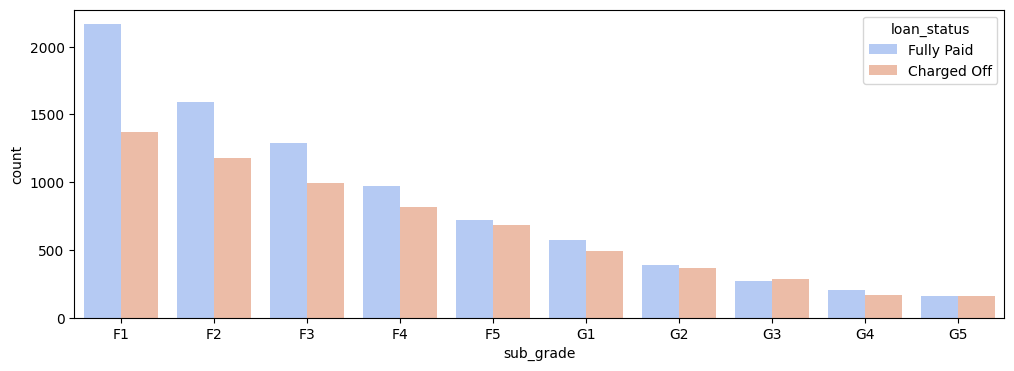

In [35]:
f_and_g=df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order=sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,
             palette='coolwarm',hue='loan_status')

In [36]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [37]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


C:\Users\ACER\AppData\Local\Temp\ipykernel_9124\660239616.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


<Axes: >

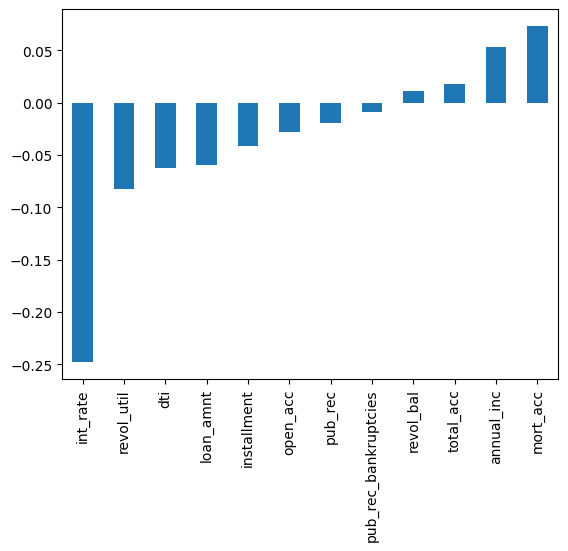

In [38]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [39]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [40]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [41]:
df['emp_title'].nunique()

173105

In [42]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [43]:
df=df.drop('emp_title',axis=1)

In [44]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [45]:
emp_length_order = [
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',
 ]

<Axes: xlabel='emp_length', ylabel='count'>

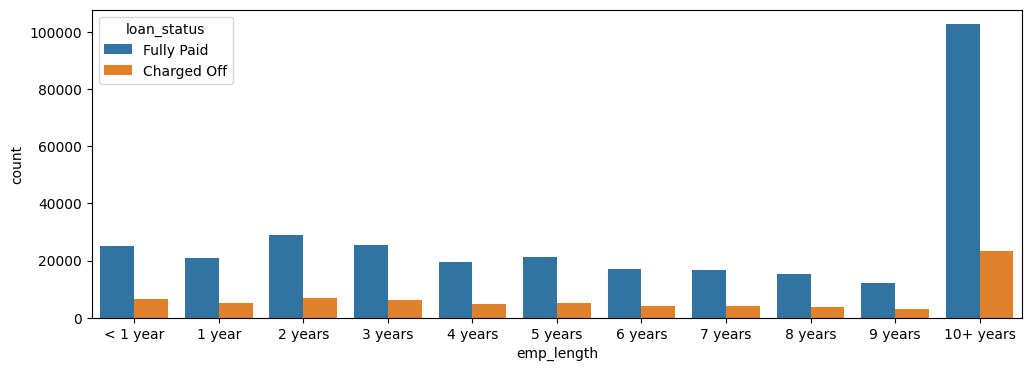

In [46]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,
             hue='loan_status')

In [47]:
emp_co=df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [48]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [49]:
emp_len=emp_co/(emp_co+emp_fp)

<Axes: xlabel='emp_length'>

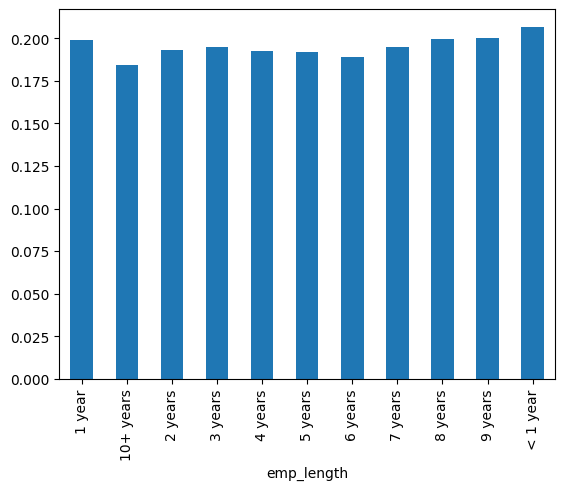

In [50]:
emp_len.plot(kind='bar')

In [51]:
df=df.drop('emp_length',axis=1)

In [52]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [53]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [54]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [55]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [56]:
df=df.drop('title',axis=1)

In [57]:
feat_info('mort_acc')

Number of mortgage accounts.


In [58]:
df.corr()['mort_acc'].sort_values()

C:\Users\ACER\AppData\Local\Temp\ipykernel_9124\2388834679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [59]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

C:\Users\ACER\AppData\Local\Temp\ipykernel_9124\1038074767.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg=df.groupby('total_acc').mean()['mort_acc']


In [60]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [61]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [62]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [63]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [64]:
df=df.dropna()

In [65]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [66]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [67]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [68]:
df=df.drop('grade',axis=1)

In [70]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [71]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [72]:
df.select_dtypes(['int64']).columns

Index(['term', 'loan_repaid'], dtype='object')

In [76]:
dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [82]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [84]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [85]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

dummies=pd.get_dummies(df['home_ownership'],drop_first=True)
df=df.drop('home_ownership',axis=1)
df=pd.concat([df,dummies],axis=1)

In [88]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [89]:
df['zip_code']=df['address'].apply(lambda address:address[-5:])

In [90]:
dummies=pd.get_dummies(df['zip_code'],drop_first=True)
df=df.drop(['zip_code','address'],axis=1)
df=pd.concat([df,dummies],axis=1)

In [92]:
df=df.drop('issue_d',axis=1)

In [93]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [94]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df=df.drop('earliest_cr_line',axis=1)

In [95]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [96]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 395219, dtype: object

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
df=df.drop('loan_status',axis=1)

In [99]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [100]:
print(len(df))

395219


In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler=MinMaxScaler()

In [104]:
X_train=scaler.fit_transform(X_train)

In [105]:
X_test=scaler.transform(X_test)

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [107]:
model=Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [108]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 10s 6ms/step - loss: 0.2989 - val_loss: 0.2643
Epoch 2/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2653 - val_loss: 0.2627
Epoch 3/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2630 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2617 - val_loss: 0.2619
Epoch 5/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2610 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2604 - val_loss: 0.2612
Epoch 7/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2600 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2597 - val_loss: 0.2617
Epoch 9/25
1236/1236 [==============================] - 8s 6ms/step - loss: 0.2593 - val_loss: 0.2618
Epoch 10/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.25

In [109]:
from tensorflow.keras.models import load_model
model.save('full_data_project_model.h5')

In [111]:
losses=pd.DataFrame(model.history.history)

<Axes: >

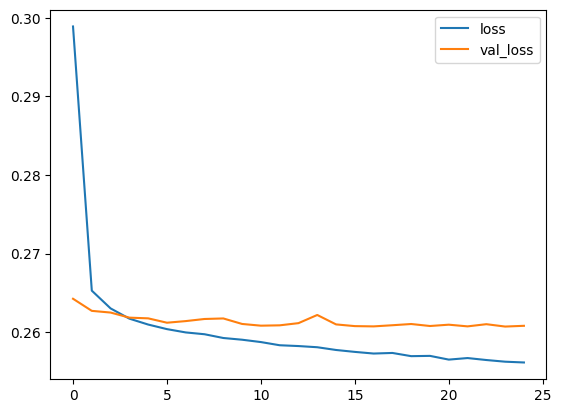

In [112]:
losses[['loss','val_loss']].plot()

In [113]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
predictions = model.predict(X_test)

2471/2471 [==============================] - 6s 2ms/step


In [121]:
import random
random.seed(101)
random_ind=random.randint(0,len(df))

new_customer=df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [123]:
model.predict(new_customer.values.reshape(1,78))

1/1 [==============================] - 0s 36ms/step


array([[1.]], dtype=float32)

In [124]:
df.iloc[random_ind]['loan_repaid']

1.0